# $ \color{blue}{\text{EJERCICIO 1}} $
## $ \color{blue}{\text{Ítem d}} $

$$ x\left( nT \right) \overset{T_k}{\longrightarrow} x\left( \left( n-k \right) T \right) \overset{T[]}{\longrightarrow} 5 \cdot nT \cdot x^2\left( \left( n-k \right) T \right) $$
$$ x\left( nT \right) \overset{T[]}{\longrightarrow} 5 \cdot nT \cdot x^2\left( nT \right) \overset{T_k}{\longrightarrow} 5 \cdot \left( n-k \right)T \cdot x^2\left( \left( n-k \right)T \right) $$

Hay diferencias $ \implies $ **No es invariante**.

$$ \\ $$

Dadas $ x_1(n) $ y $ x_2(n) $ tal que:
$$ x_1(nT) = x_2(nT) \quad \forall n \leq k $$
$$ x_1(nT) \neq x_2(nT) \quad \forall n>k $$
$$ \left. {T\left[ x_1(nT) \right]} \right|_{n=k} = 5 \cdot kT \cdot x_1^2(kT) = 5 \cdot kT \cdot x_2^2(kT) = \left. T\left[ x_2(nT) \right] \right|_{n=k}$$

$ \implies $ **Es causal**.

$$ \\ $$

Dada $ x(nT) = \alpha x_1(nT) + \beta x_2(nT) $:
$$ T\left[ x(nT) \right] = 5 \cdot nT \cdot \left( \alpha x_1(nT) + \beta x_2(nT) \right)^2 $$
$$ \alpha T\left[ x_1(nT) \right] + \beta T\left[ x_2(nT) \right] = \alpha \cdot 5 \cdot nT \cdot x_1^2(nT) + \beta \cdot 5 \cdot nT \cdot x_2^2(nT) $$

Son distintos $ \implies $ **No es lineal**.

## $ \color{blue}{\text{Ítem e}} $

$$ x\left( nT \right) \overset{T_k}{\longrightarrow} x\left( \left( n-k \right) T \right) \overset{T[]}{\longrightarrow} 3 \cdot x ((n-k)T+3T) $$
$$ x\left( nT \right) \overset{T[]}{\longrightarrow} 3 \cdot x (nT+3T) \overset{T_k}{\longrightarrow} 3 \cdot x ((n-k)T+3T) $$

No hay diferencias $ \implies $ **Es invariante**.

$$ \\ $$

Dadas $ x_1(n) $ y $ x_2(n) $ tal que:
$$ x_1(nT) = x_2(nT) \quad \forall n \leq k $$
$$ x_1(nT) \neq x_2(nT) \quad \forall n>k $$
$$ \left. {T\left[ x_1(nT) \right]} \right|_{n=k} = 3 \cdot x_1 ((k+3)T)$$
$$ \left. {T\left[ x_2(nT) \right]} \right|_{n=k} = 3 \cdot x_2 ((k+3)T)$$
$$ x_1(k+3) \neq x_2(k+3)$$

$ \implies $ **No es causal**.

$$\\$$

Dada $ x(nT) = \alpha x_1(nT) + \beta x_2(nT) $:
$$ T\left[ x(nT) \right] = 3 \left( \alpha \cdot x_1(nT+3T) + \beta \cdot x_2(nT+3T) \right) = 3\cdot \alpha \cdot x_1(nT+3T) + 3 \cdot \beta \cdot x_2(nT+3T) $$
$$ \alpha T\left[ x_1(nT) \right] + \beta \cdot T\left[ x_2(nT) \right] = \alpha \cdot 3 \cdot x_1(nT + 3T) + \beta \cdot 3 \cdot x_2(nT + 3T) $$

Son iguales $ \implies $ **Es lineal**.

## $ \color{blue}{\text{Ítem i}} $

Dado el sistema $T_x(nT)=x(nT+T)\cdot e^{-nT}$ se analiza si el mismo es invariante, causal y lineal.

$$ x\left( nT \right) \overset{T_k}{\longrightarrow} x\left( \left( n-k \right) T \right) \overset{T[]}{\longrightarrow} x((n-k)T+T)\cdot e^{-nT} $$
$$ x\left( nT \right) \overset{T[]}{\longrightarrow} x(nT+T)\cdot e^{-nT} \overset{T_k}{\longrightarrow} x((n-k)T+T)\cdot e^{-(n-k)T}$$

<br>

Son distintas $\implies$ **No invariante.**

<br>

Dadas $ x_1(nT) $ y $ x_2(nT) $ tales que:
$$ x_1(nT) = x_2(nT) \quad \forall n \leq k $$
$$ x_1(nT) \neq x_2(nT) \quad \forall n>k $$
$$ \left. {T\left[ x_1(nT) \right]} \right|_{n=k} = x_1((k+1)T)\cdot e^{-kT}$$ 
$$ \left. {T\left[ x_2(nT) \right]} \right|_{n=k} = x_2((k+1)T)\cdot e^{-kT}$$

<br>

Como $x_1((k+1)T) \neq x_1((k+1)T) \implies \left. {T\left[ x_1(nT) \right]} \right|_{n=k} \neq \left. {T\left[ x_2(nT) \right]} \right|_{n=k} \implies $ **No es causal.**

<br>

Dada $ x(nT) = \alpha x_1(nT) + \beta x_2(nT) $:
$$ T\left[ x(nT) \right] = (\alpha \cdot x_1(nT+T) + \beta \cdot x_2(nT+T)) \cdot e^{-nT} = \alpha \cdot x_1(nT+T)\cdot e^{-nT} + \beta \cdot x_2(nT+T)\cdot e^{-nT} = \alpha T\left[ x_1(nT) \right] + \beta T\left[ x_2(nT) \right] $$

<br>

Como $T\left[ x(nT) \right] = \alpha T\left[ x_1(nT) \right] + \beta T\left[ x_2(nT) \right] \implies $ **Es lineal.**

# $ \color{blue}{\text{EJERCICIO 2}} $

## $ \color{blue}{\text{Ítem b}} $

![title](Resources/EJ2/ej2B.png)

<br>

Se llama $z(n)$ a la señal en el nodo marcado con rojo en la figura anterior, de forma que:

$$ z(nT) = x(nT) + z((n-1)T) - 0,5 \cdot z((n-2)T)$$
$$ y(nT) = z(nT) + z((n-1)T)$$

<br>

Se le aplica un corrimiento a la ecuación de $y(nT)$, llegando a la siguiente expresión:
$y((n-1)T) = z((n-1)T) + z((n-2)T) \implies z((n-2)T) = y((n-1)T) - z((n-1)T)$

Reemplazandola en la expresión de $z(nT)$ y luego aplicandole un corrimiento, se obtiene:
$z((n-1)T) = \frac{2}{5} x((n-1)T) + \frac{3}{5} y((n-1)T) - \frac{1}{5} y((n-2)T)$

Esta última se utiliza para reemplazar en la expresión de $z((n-2)T)$, obteniendo:
$z((n-2)T) = -\frac{2}{5} x((n-1)T) + \frac{2}{5} y((n-1)T) + \frac{1}{5} y((n-2)T)$

<br>

Y finalmente, dado que $y(nT) = z(nT) + z((n-1)T)$ y que a su vez $z(nT)$ depende de $z((n-1)T)$ y de $z((n-2)T)$, se reemplaza con las expresiones de estas dos últimas, obteniendo:
$$y(nT) = x(nT) + x((n-1)T) + y((n-1)T) - 0,5 \cdot y((n-2)T)$$ 



# $ \color{blue}{\text{EJERCICIO 9}} $
![title](Resources/EJ9/ej9_system.png)

<br>

Se simulará la siguiente ecuación en diferencias, que se extrae del diagrama anterior:
$$ y(nT) = \frac{1}{2} \cdot x\left( (n-2)T \right) + \alpha \cdot y\left( (n-1)T \right) + \beta \cdot y\left( (n-2)T \right) $$

Dado que no se especifica, se toma que el sistema se encuentra originalmente relajado.

In [61]:
import matplotlib.pyplot as plt
import numpy as np

In [62]:
def my_lfilter(b, a, x):
    ''' same as scipy.signal.lfilter but done by hand'''
    res = []
    yn1 = 0
    yn2 = 0
    xn1 = 0
    xn2 = 0
    for i in range(len(x)):
        y = b[2] * xn2 + a[1] * yn1 + a[2] * yn2
        yn2 = yn1
        yn1 = y
        xn2 = xn1
        xn1 = x[i]
        res.append(y)
    
    return res

In [65]:
delta = ss.unit_impulse(30)
step = np.heaviside(range(30), 1)
alpha = [1, 1/2, 5/4]
beta = [-1/2, -1/8, -25/32]
responses = []

for i in range(3):
    b = [0, 0, 1/2]
    a = [1, alpha[i], beta[i]]
    impulse_resp = my_lfilter(b, a, delta)
    step_resp = my_lfilter(b, a, step)
    responses.append((impulse_resp, step_resp))

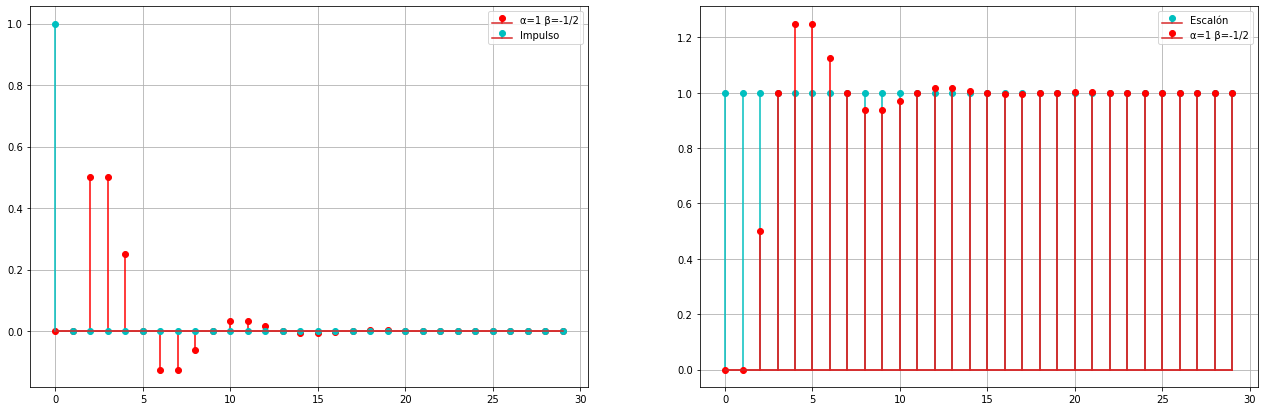

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

ax1.stem(np.arange(0, 30), responses[0][0], 'r', label='α=1 β=-1/2', markerfmt='ro')
ax1.stem(np.arange(0, 30), delta, 'c', label='Impulso', markerfmt='co')

ax1.grid(True)
ax1.legend()

ax2.stem(np.arange(0, 30), step, 'c', label='Escalón', markerfmt='co')
ax2.stem(np.arange(0, 30), responses[0][1], 'r', label='α=1 β=-1/2', markerfmt='ro')

ax2.grid(True)
ax2.legend()

fig.show()

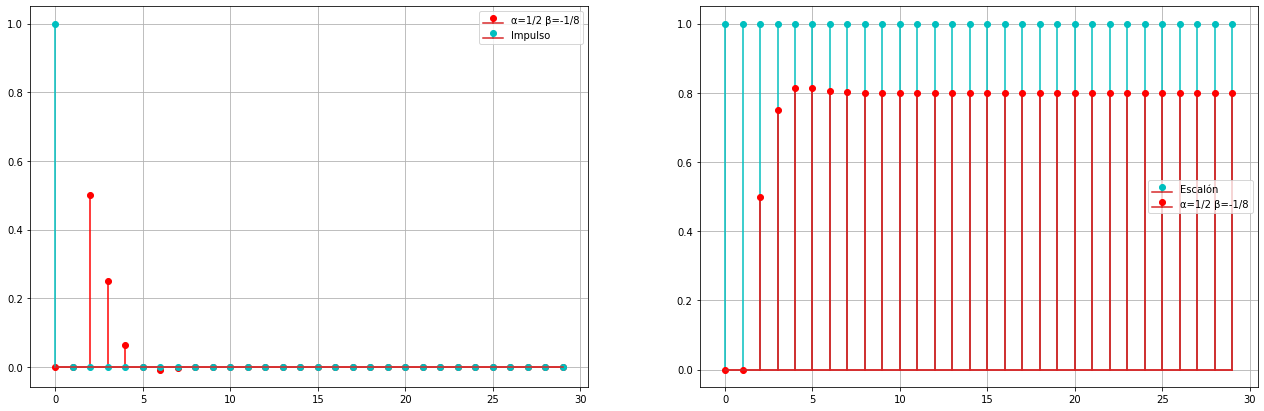

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

ax1.stem(np.arange(0, 30), responses[1][0], 'r', label='α=1/2 β=-1/8', markerfmt='ro')
ax1.stem(np.arange(0, 30), delta, 'c', label='Impulso', markerfmt='co')

ax1.grid(True)
ax1.legend()

ax2.stem(np.arange(0, 30), step, 'c', label='Escalón', markerfmt='co')
ax2.stem(np.arange(0, 30), responses[1][1], 'r', label='α=1/2 β=-1/8', markerfmt='ro')

ax2.grid(True)
ax2.legend()

fig.show()

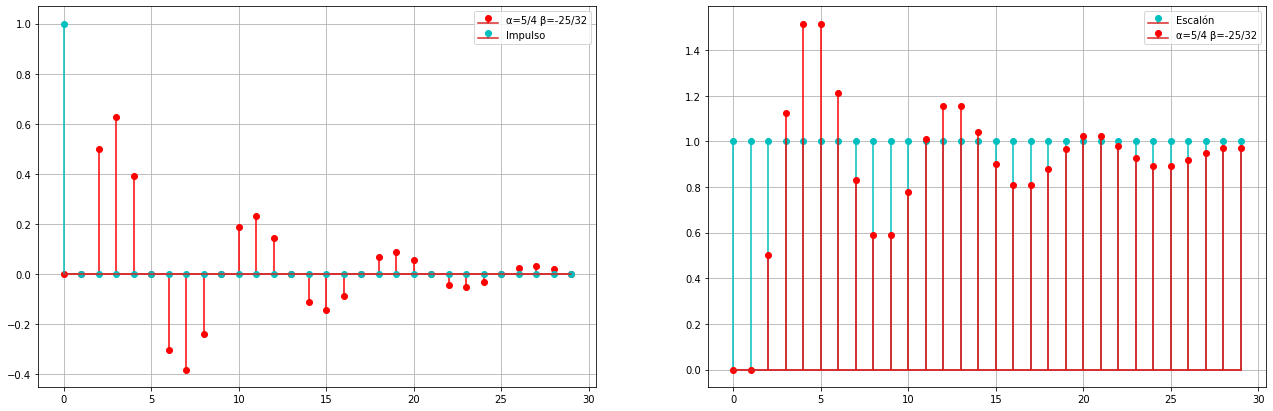

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

ax1.stem(np.arange(0, 30), responses[2][0], 'r', label='α=5/4 β=-25/32', markerfmt='ro')
ax1.stem(np.arange(0, 30), delta, 'c', label='Impulso', markerfmt='co')

ax1.grid(True)
ax1.legend()

ax2.stem(np.arange(0, 30), step, 'c', label='Escalón', markerfmt='co')
ax2.stem(np.arange(0, 30), responses[2][1], 'r', label='α=5/4 β=-25/32', markerfmt='ro')

ax2.grid(True)
ax2.legend()

fig.show()

En los tres casos anteriores puede apreciarse un sistema subamortiguado, que varía en su constante de tiempo pero no en su período. Mientras que en el primero y el último puede apreciarse un período entero de $ T = 8 $, en el segundo puede apenas detectarse medio período de duración 4, pero en fin, resultando en que todos los sistemas tengan una frecuencia:
$$ f = \frac{1}{8} $$

### Método para determinar la respuesta en frecuencia
Así como se puede encontrar la respuesta al impulso y al escalón mediante la iteración sobre la ecuación en diferencias del sistema, la respuesta en frecuencia puede ser determinada de la misma manera, con la diferencia de que como entrada se toma una señal $ e^{j \cdot \omega} $. Puede observarse su respuesta en frecuencia de forma gráfica, de la misma manera que se hizo con las otras dos mencionadas, o puede buscarse un patrón de repetición en la serie que se está analizando, e inferir de esa manera una ecuación general para la respuesta en frecuencia, para todo n.

# $ \color{blue}{\text{EJERCICIO 11}} $
![title](Resources/EJ11/ej11_system.png)

## $ \color{blue}{\text{Ítem a}} $
Del diagrama anterior se extrae la ecuación en diferencias que describe al sistema:
$$ y(nT) = 0.4 \cdot x(nT) + 0.4 \cdot y\left( (n-1)T \right) $$

Se transforma el sistema mediante la transformada $Z$, asumiendo que está originalmente relajado se obtiene:
$$ Y(z) = 0.4 \cdot X(z) + 0.4 \cdot z^{-1} \cdot Y(z) $$
De lo cual se despeja la función transferencia del sistema:
$$ H(z) = \frac{Y(z)}{X(z)} = \frac{z}{\frac{z}{0.4} - 1} $$

Mediante el cambio de variable $ z = e^{j \cdot 2\pi \cdot f T} $ se obtiene la respuesta en frecuencia del sistema:
$$ H(e^{j \cdot 2\pi \cdot f T}) = \frac{ e^{j \cdot 2\pi \cdot f T} }{ \frac{e^{j \cdot 2\pi \cdot f T}}{0.4} - 1 } $$

De la cual se obtiene el módulo, que representa la ganancia del sistema:
$$ \left| H(e^{j \cdot 2\pi \cdot f T}) \right| = \frac{1}{ \sqrt{ \left( \frac{5}{2} \cdot \cos{\left( 2\pi \cdot f T \right)} - 1 \right)^2 + \left( \frac{5}{2} \cdot \sin{\left( 2\pi \cdot f T \right)} \right)^2 } } = \frac{2}{ \sqrt{ 29 - 20 \cdot \cos{\left( 2\pi \cdot f T \right)} } } $$

Mediante las herramientas de *matplotlib* se grafica el resultado obtenido, utilizando como período de muestreo $ T = 1ms $:

In [84]:
import matplotlib.pyplot as plt
import numpy as np

In [85]:
f = np.logspace(0, 3, 300)
mag = 2 / (np.sqrt( 29 - 20 * np.cos(2 * np.pi * f * 0.001) ))
mag = 20 * np.log10(mag)

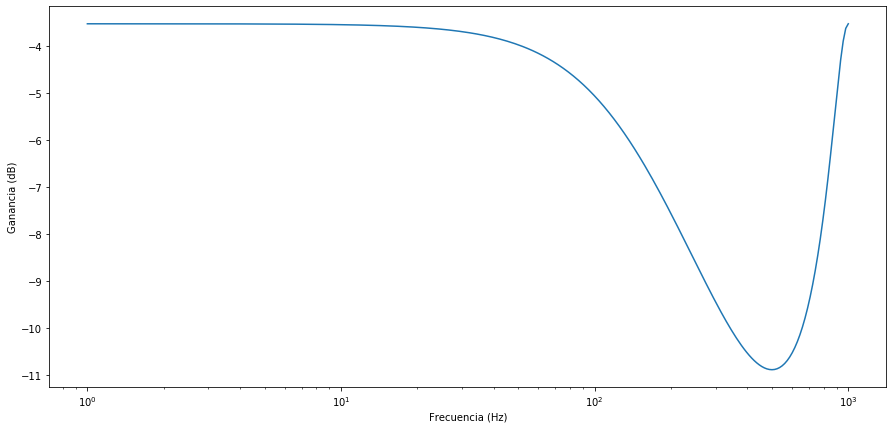

In [98]:
plt.figure(figsize=(15, 7))
plt.semilogx(f, mag)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.show()

Se corrobora mediante la simulación del sistema utilizando la herramienta *scipy.signal*:

In [87]:
import scipy.signal as ss

In [88]:
n = [0.4, 0]
d = [1, -0.4]
sys = ss.dlti(n, d, dt=0.001)

In [92]:
f = np.logspace(0, 3, 300)
w = f * 2 * np.pi

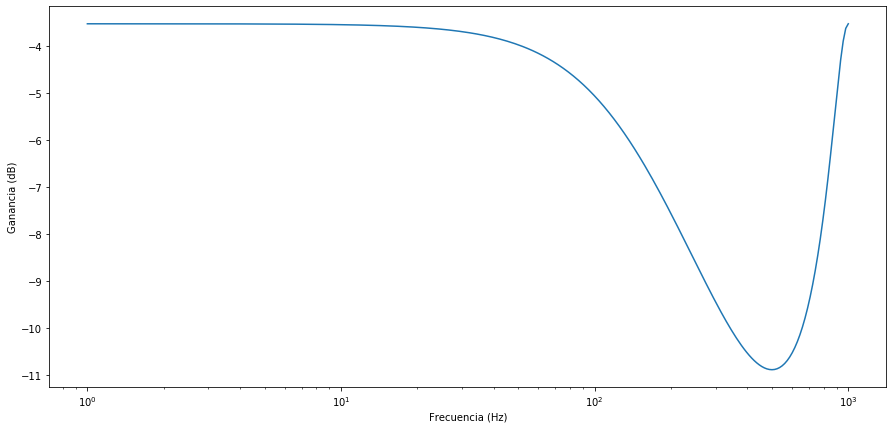

In [99]:
norm_w = w/1000
w, mag, phase = sys.bode(w=norm_w, n=300)

plt.figure(figsize=(15, 7))
plt.semilogx(f, mag)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.show()

## $ \color{blue}{\text{Ítem b}} $
Haciendo uso de lo ya simulado, se busca el valor de frecuencia para el cual la ganancia disminuye en $ 3dB $:

In [100]:
fc = 0
for i in range(len(f)):
    if (mag[0] - 3) > mag[i]:
        fc = f[i]
        break

print('La frecuencia de corte, donde la ganancia baja 3dB, es de: %.2f Hz' % fc)

La frecuencia de corte, donde la ganancia baja 3dB, es de: 157.52 Hz
